In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels import api as sm
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from collections import Counter
import ast
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder_path = r"E:\myproject\steam"

# Danh sách tên các file
filenames = [
    "achievements.csv",
    "friends.csv",
    "games.csv",
    "history.csv",
    "players.csv",
    "prices.csv",
    "private_steamids.csv",
    "purchased_games.csv",
    "reviews.csv"
]

for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    var_name = os.path.splitext(filename)[0]
    globals()[var_name] = pd.read_csv(file_path)

In [3]:
players.head(5)

,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
2,76561198049686270,NaN,2011-09-28 21:43:59
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
4,76561198119605821,NaN,2013-12-26 00:25:50


In [4]:
purchased_games.head(5)

,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."


In [5]:
friends.head(5)

,playerid,friends
0,76561198060422271,"['76561198018120276', '76561198034545417', '76..."
1,76561198113439786,"['76561198047435192', '76561198059136488', '76..."
2,76561198149851326,"['76561197991555589', '76561198003513187', '76..."
3,76561198296997371,NaN
4,76561198895573082,"['76561197960300358', '76561197961330830', '76..."


In [6]:
players = players.merge(purchased_games, on='playerid', how='left')
players = players.merge(friends, on='playerid', how='left')
players.head(5)
# join các bảng dữ liệu cần phân tích

,playerid,country,created,library,friends
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76..."
2,76561198049686270,NaN,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76..."
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76..."
4,76561198119605821,NaN,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76..."


In [7]:
players.info()
#Thực hiện EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424683 entries, 0 to 424682
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerid  424683 non-null  int64 
 1   country   246815 non-null  object
 2   created   377014 non-null  object
 3   library   46941 non-null   object
 4   friends   339461 non-null  object
dtypes: int64(1), object(4)
memory usage: 16.2+ MB


In [8]:
players.shape

(424683, 5)

In [9]:
players.describe()

,playerid
count,4.246830e+05
mean,7.656120e+16
std,3.995359e+08
min,7.656120e+16
25%,7.656120e+16
50%,7.656120e+16
75%,7.656120e+16
max,7.656120e+16


In [10]:
players.isnull().sum()

playerid         0
country     177868
created      47669
library     377742
friends      85222
dtype: int64

Text(0.5, 1.0, 'Top 10 quốc gia có nhiều người chơi nhất')

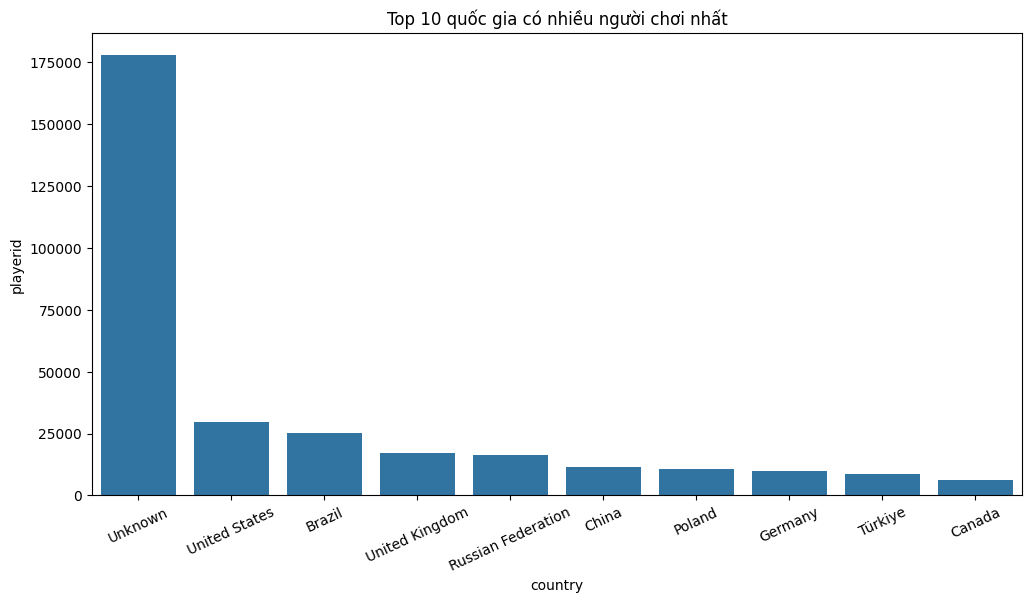

In [11]:
players["country"]= players["country"].fillna("Unknown")
country_counts=  players.groupby("country").agg({'playerid':'count'}).reset_index()
country_counts= country_counts.sort_values(by="playerid", ascending= False)
plt.figure(figsize =(12,6))
sns.barplot(x= country_counts["country"][:10], y= country_counts["playerid"][:10])
plt.xticks(rotation= 25)
plt.title("Top 10 quốc gia có nhiều người chơi nhất")

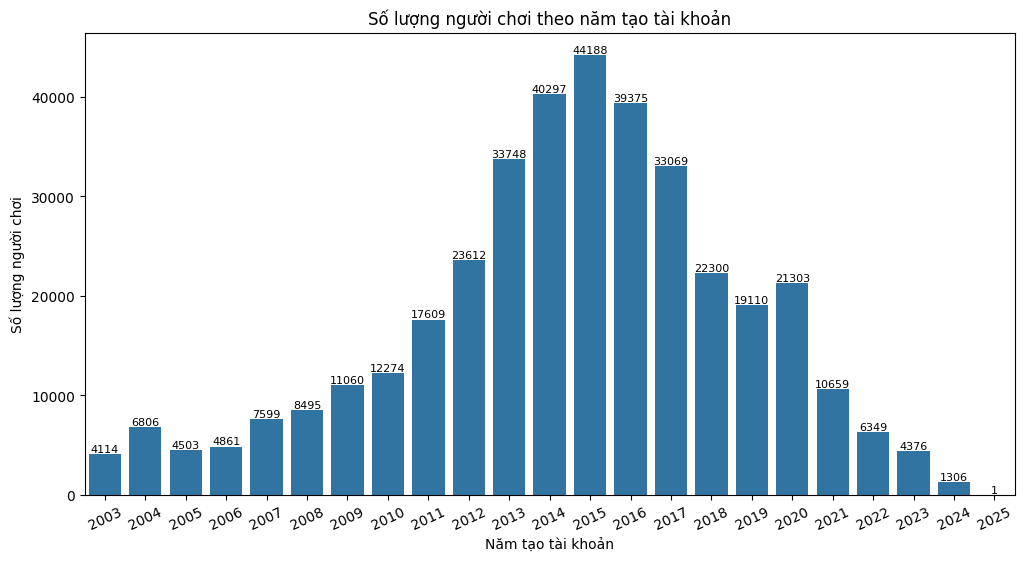

In [12]:
players["year_created"] = players["created"].str[:4]
gby = players.groupby("year_created").agg({"playerid":'count'}).reset_index()

plt.figure(figsize =(12,6))
ax =sns.barplot(x= gby["year_created"], y= gby["playerid"])
plt.xticks(rotation= 25)
plt.title("Số lượng người chơi theo năm tạo tài khoản")
plt.xlabel("Năm tạo tài khoản")
plt.ylabel("Số lượng người chơi")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   
        height,                            
        f'{int(height)}',                     
        ha='center',                     
        va='bottom' ,    
        fontsize = 8                 
    )


In [13]:
def count_value(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    else:
        return [] 
    

playerss= players[players['library'].notna()].copy()
playerss["library"] = playerss["library"].apply(count_value)
    


In [14]:
all_games = [game for sublist in playerss['library'] for game in sublist]
game_counts = Counter(all_games)

if game_counts:
    most_common_game, count = game_counts.most_common(1)[0]
    print(f"Game ID phổ biến nhất: {most_common_game}, Số lần xuất hiện: {count}")
else:
    print("Không có dữ liệu hợp lệ")

Game ID phổ biến nhất: 730, Số lần xuất hiện: 43967


In [15]:
game_count = pd.DataFrame(game_counts.items(), columns=['gameid', 'count'])
game_count = game_count.sort_values(by="count", ascending= False)
game_count
# Tìm những tựa game có trong thư viện của người chơi nhiều nhất

,gameid,count
149,730,43967
308,578080,28356
24,550,24727
297,218620,23785
651,304930,21620
...,...,...
32706,663020,1
32718,656170,1
32744,647790,1
37386,560920,1


In [16]:
game_count = game_count.merge(games, on='gameid', how='left')
game_count 

,gameid,count,title,developers,publishers,genres,supported_languages,release_date
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07
...,...,...,...,...,...,...,...,...
40983,663020,1,Cutlass,['Demigon'],['Demigon'],"['Action', 'Adventure', 'Indie', 'Simulation']",['English'],2017-07-20
40984,656170,1,RadianVR,['Grand Unified LLC'],['Grand Unified LLC'],"['Casual', 'Indie']",['English'],2018-03-08
40985,647790,1,Holomeld,['mindmeld.io Inc.'],['mindmeld.io Inc.'],['Indie'],['English'],2017-09-20
40986,560920,1,Cyberlink PowerDVD 17 Ultra,['CyberLink'],['Koch Media'],['Video Production'],"['English', 'French', 'Italian', 'German', 'Sp...",2017-04-18


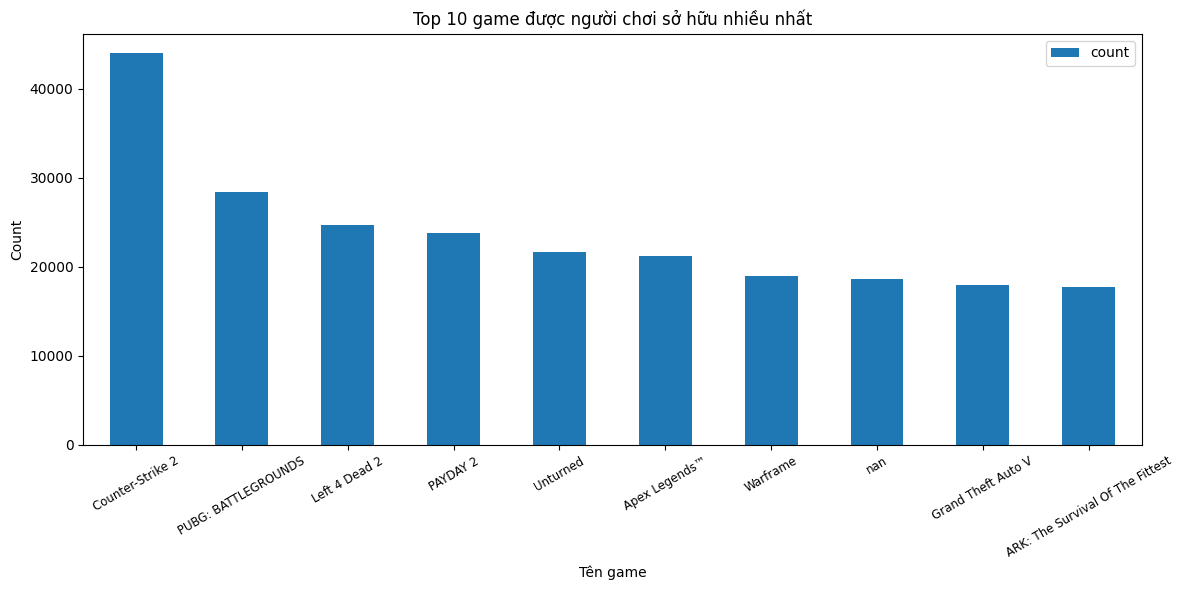

In [17]:
game_count.head(10).plot(kind='bar', x='title', y='count', figsize=(12, 6))
plt.title('Top 10 game được người chơi sở hữu nhiều nhất')
plt.xlabel('Tên game')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=8.5)
plt.tight_layout()
plt.show()
# 3 tựa game phổ biến nhất là CS2, PUBG và Left for Dead 2, các tựa game không có tên tập hợp lại xếp thứ 8

In [18]:
game_count.loc[game_count['developers'] == "['Valve']"]["title"].unique()

array(['Counter-Strike 2', 'Left 4 Dead 2', 'Portal 2',
       'Half-Life 2: Deathmatch', 'Half-Life Deathmatch: Source',
       'Half-Life 2', 'Counter-Strike', 'Counter-Strike: Source',
       'Counter-Strike: Condition Zero', 'Portal', 'Half-Life',
       'Left 4 Dead', 'Team Fortress Classic', 'Day of Defeat: Source',
       'Day of Defeat', 'Ricochet', 'Deathmatch Classic',
       'Half-Life: Source', 'Dota Underlords', 'The Lab',
       'Half-Life: Alyx', 'Aperture Desk Job', 'Artifact', 'Alien Swarm'],
      dtype=object)

In [19]:
games.head(10)

,gameid,title,developers,publishers,genres,supported_languages,release_date
0,3281560,Horror Game To Play With Friends! Playtest,NaN,NaN,NaN,NaN,2024-10-21
1,3280930,Eternals' Path Playtest,NaN,NaN,NaN,NaN,2024-10-17
2,3280770,ANGST: A TALE OF SURVIVAL - Singleplayer Playtest,NaN,NaN,NaN,NaN,2024-10-13
3,3279790,Montabi Playtest,NaN,NaN,NaN,NaN,2024-10-13
4,3278320,파이팅걸 유리 Playtest,NaN,NaN,NaN,NaN,2024-10-12
5,3278740,NEURO,['Revolt Games'],['Strategy First'],['Action'],"['English', 'Russian']",2024-10-11
6,3277430,Objective: F.E.A.S.T. Playtest,NaN,NaN,NaN,NaN,2024-10-12
7,3276500,Fortune Avenue Playtest,NaN,NaN,NaN,NaN,2024-10-09
8,3274370,Beyond the Ordinary Playtest,NaN,NaN,NaN,NaN,2024-10-11
9,3274670,Quantum Joe Playtest,NaN,NaN,NaN,NaN,2024-10-11


In [20]:
def bo_ngoac_vuong(x):
    try:
        val = ast.literal_eval(x)
        if isinstance(val, list):
            return ', '.join(str(item) for item in val)
        return str(val)
    except:
        return x 

# Apply to all columns
games_cleaned = games.applymap(bo_ngoac_vuong)
games_cleaned.head(10)

,gameid,title,developers,publishers,genres,supported_languages,release_date
0,3281560,Horror Game To Play With Friends! Playtest,NaN,NaN,NaN,NaN,2024-10-21
1,3280930,Eternals' Path Playtest,NaN,NaN,NaN,NaN,2024-10-17
2,3280770,ANGST: A TALE OF SURVIVAL - Singleplayer Playtest,NaN,NaN,NaN,NaN,2024-10-13
3,3279790,Montabi Playtest,NaN,NaN,NaN,NaN,2024-10-13
4,3278320,파이팅걸 유리 Playtest,NaN,NaN,NaN,NaN,2024-10-12
5,3278740,NEURO,Revolt Games,Strategy First,Action,"English, Russian",2024-10-11
6,3277430,Objective: F.E.A.S.T. Playtest,NaN,NaN,NaN,NaN,2024-10-12
7,3276500,Fortune Avenue Playtest,NaN,NaN,NaN,NaN,2024-10-09
8,3274370,Beyond the Ordinary Playtest,NaN,NaN,NaN,NaN,2024-10-11
9,3274670,Quantum Joe Playtest,NaN,NaN,NaN,NaN,2024-10-11


Text(0.5, 1.0, 'Top 10 thể loại game phổ biến nhất')

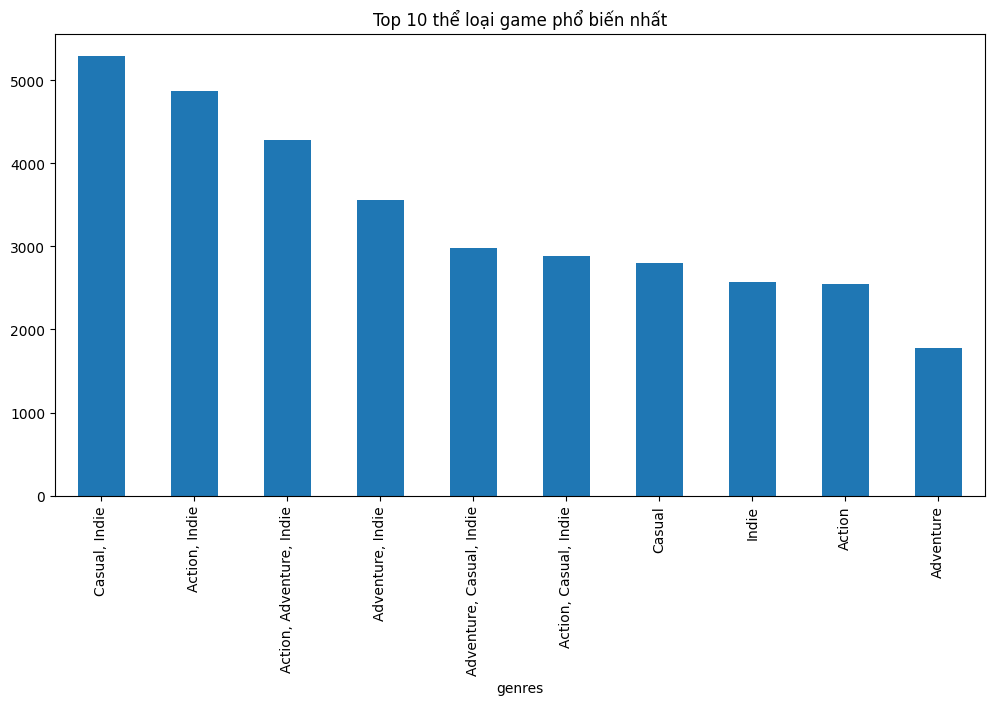

In [21]:
games_cleaned["genres"].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 thể loại game phổ biến nhất')

In [22]:
players.head(5)

,playerid,country,created,library,friends,year_created
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,2016
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",2011
2,76561198049686270,Unknown,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",2011
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",2014
4,76561198119605821,Unknown,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76...",2013


In [23]:
def playcs2(row):
    try:
        # Convert string to actual list if needed
        games = row if isinstance(row, list) else ast.literal_eval(row)
        if len(games) > 0:
             return 1 if any(game in set([730]) for game in games) else 0
        else:
            return 0
    except:
        return 0  #
    
players["play_cs2"] = players["library"].apply(playcs2)
players.head(30)

,playerid,country,created,library,friends,year_created,play_cs2
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,2016,1
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",2011,1
2,76561198049686270,Unknown,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",2011,0
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",2014,0
4,76561198119605821,Unknown,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76...",2013,1
5,76561198083492916,Russian Federation,2013-02-09 04:05:02,"[1300, 1309, 1313, 2500, 1510, 2100, 2130, 383...","['76561197960300493', '76561197960399877', '76...",2013,1
6,76561198150634683,Madagascar,2014-08-19 01:49:11,"[10, 30, 40, 60, 80, 100, 70, 220, 202200, 673...","['76561197960618312', '76561197961226780', '76...",2014,1
7,76561198836367256,Australia,2018-05-19 06:17:07,"[2600, 15100, 500, 282140, 367500, 480490, 403...","['76561197960364629', '76561197960506705', '76...",2018,0
8,76561198106910534,Russian Federation,2013-09-12 21:32:44,NaN,['76561198042412488'],2013,0
9,76561198122070915,Unknown,2014-01-08 02:38:32,"[50, 70, 130, 1200, 16730, 9480, 17470, 19000,...","['76561197972014387', '76561197974486376', '76...",2014,1


In [24]:
players.loc[players["play_cs2"] == 1, ["library"]].head(10)
total_friends = players["friends"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
players["total_friends"] = total_friends
players

,playerid,country,created,library,friends,year_created,play_cs2,total_friends
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,2016,1,0
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",2011,1,316
2,76561198049686270,Unknown,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",2011,0,718
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",2014,0,94
4,76561198119605821,Unknown,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76...",2013,1,20
...,...,...,...,...,...,...,...,...
424678,76561198043034661,United States,2011-06-10 04:24:19,NaN,"['76561198022309299', '76561198055468112', '76...",2011,0,14
424679,76561198024121089,Unknown,NaN,NaN,NaN,NaN,0,0
424680,76561198037550552,United States,2011-01-30 23:05:31,NaN,"['76561197961861951', '76561198032565452', '76...",2011,0,34
424681,76561198318714880,Unknown,NaN,NaN,NaN,NaN,0,0


In [25]:
plt.figure(figsize=(15, 18))

<Figure size 1500x1800 with 0 Axes>

<Figure size 1500x1800 with 0 Axes>

In [26]:
total_games = players["library"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
players["total_games"] = total_games
players.head(10)


,playerid,country,created,library,friends,year_created,play_cs2,total_friends,total_games
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN,2016,1,0,476
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76...",2011,1,316,836
2,76561198049686270,Unknown,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76...",2011,0,718,0
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76...",2014,0,94,0
4,76561198119605821,Unknown,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76...",2013,1,20,20
5,76561198083492916,Russian Federation,2013-02-09 04:05:02,"[1300, 1309, 1313, 2500, 1510, 2100, 2130, 383...","['76561197960300493', '76561197960399877', '76...",2013,1,486,1509
6,76561198150634683,Madagascar,2014-08-19 01:49:11,"[10, 30, 40, 60, 80, 100, 70, 220, 202200, 673...","['76561197960618312', '76561197961226780', '76...",2014,1,201,1290
7,76561198836367256,Australia,2018-05-19 06:17:07,"[2600, 15100, 500, 282140, 367500, 480490, 403...","['76561197960364629', '76561197960506705', '76...",2018,0,1107,445
8,76561198106910534,Russian Federation,2013-09-12 21:32:44,NaN,['76561198042412488'],2013,0,1,0
9,76561198122070915,Unknown,2014-01-08 02:38:32,"[50, 70, 130, 1200, 16730, 9480, 17470, 19000,...","['76561197972014387', '76561197974486376', '76...",2014,1,175,1805


In [27]:
players.describe()

,playerid,play_cs2,total_friends,total_games
count,4.246830e+05,424683.000000,424683.000000,424683.000000
mean,7.656120e+16,0.103529,72.768003,26.510868
std,3.995359e+08,0.304649,104.240173,298.783994
min,7.656120e+16,0.000000,0.000000,0.000000
25%,7.656120e+16,0.000000,6.000000,0.000000
50%,7.656120e+16,0.000000,43.000000,0.000000
75%,7.656120e+16,0.000000,102.000000,0.000000
max,7.656120e+16,1.000000,2000.000000,32463.000000


In [28]:
players["year_created"] = players["year_created"].astype(float)
players_nonull = players[players["created"].notna()]
X= players_nonull[["year_created", "total_friends", "total_games"]]
y= players_nonull["play_cs2"]


Text(0.5, 1.0, 'Top 10 countries playing CS2')

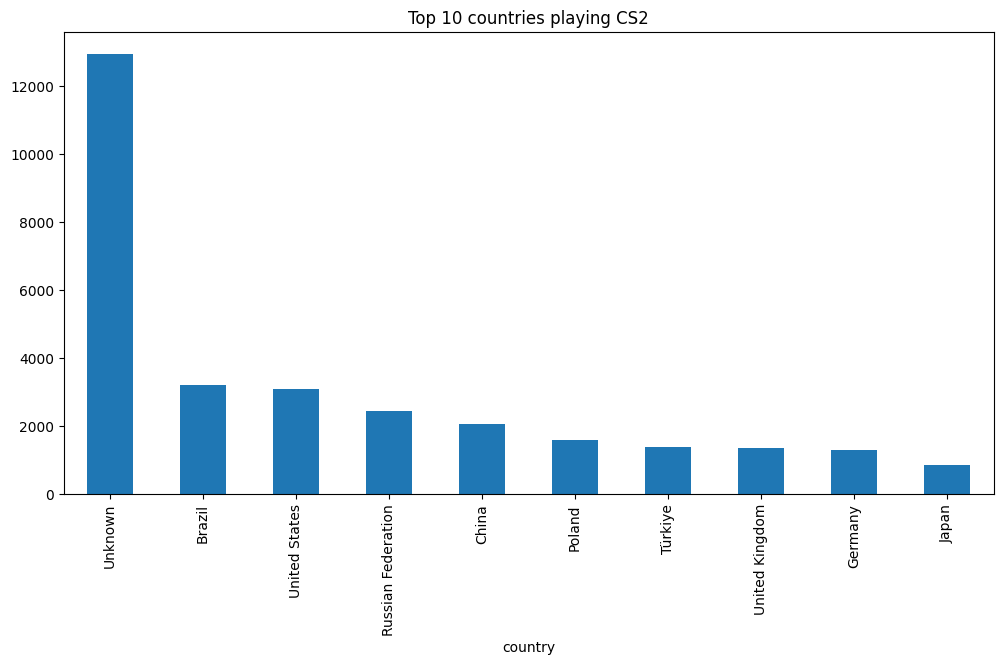

In [29]:
players[players["play_cs2"] == 1]["country"].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 countries playing CS2')

Text(0.5, 1.0, 'Heatmap of correlations')

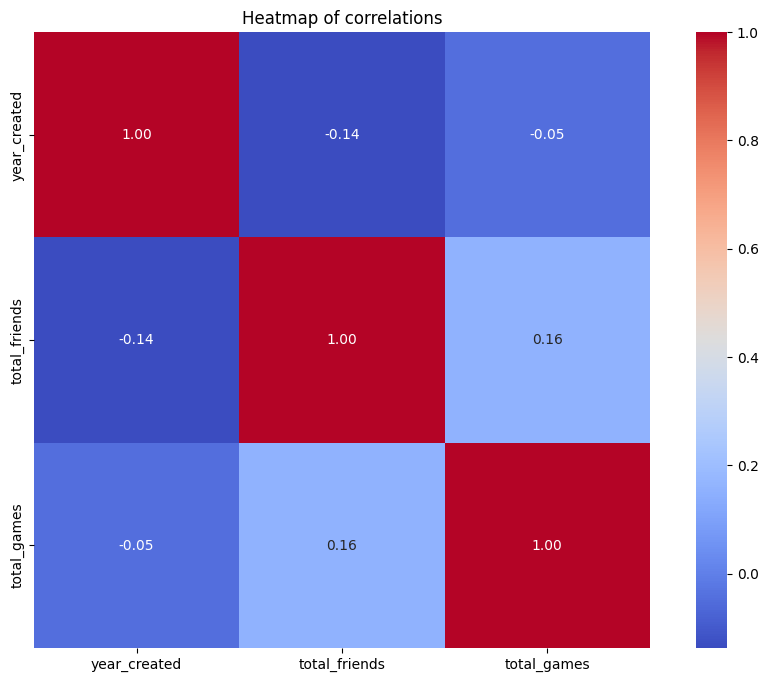

In [30]:
heatmap = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap of correlations")
# Không có multicollinearity giữa các biến độc lập, có thể sử dụng hồi quy logistic để dự đoán biến nhị phân play_cs2, dựa vào dataset có thể giả định các quan sát độc lập với nhau

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[-0.00142696,  0.00074384,  0.03648257]]), array([-1.34636692e-06]))

In [32]:
y_pred = model.predict(X_test)

In [33]:
logistic_accuracy = metrics.accuracy_score(y_test, y_pred)
logistic_f1 = metrics.f1_score(y_test, y_pred)
logistic_precision = metrics.precision_score(y_test, y_pred)
logistic_recall = metrics.recall_score(y_test, y_pred)

In [34]:
Counter(y_pred)

Counter({0: 70767, 1: 4636})

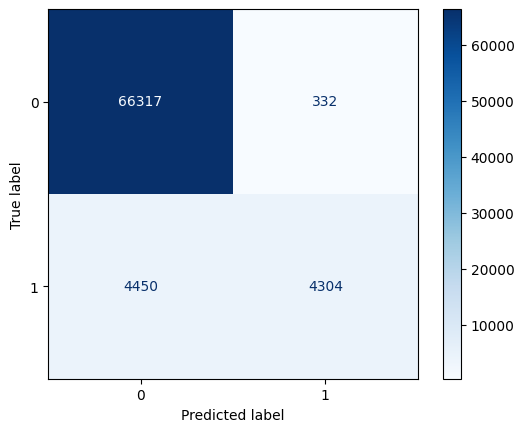

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred,labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)


In [36]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preddd = decision_tree.predict(X_test)

In [37]:

y_preddd = decision_tree.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, y_preddd)
decision_tree_f1 = metrics.f1_score(y_test, y_preddd)
decision_tree_precision = metrics.precision_score(y_test, y_preddd)
decision_tree_recall = metrics.recall_score(y_test, y_preddd)

[Text(0.4375, 0.9, 'total_games <= 0.5\ngini = 0.205\nsamples = 301611\nvalue = [266594, 35017]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 264205\nvalue = [264205, 0]'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.5, 0.7, 'total_friends <= 41.5\ngini = 0.12\nsamples = 37406\nvalue = [2389, 35017]'),
 Text(0.46875, 0.8, '  False'),
 Text(0.25, 0.5, 'year_created <= 2013.5\ngini = 0.177\nsamples = 12048\nvalue = [1185, 10863]'),
 Text(0.125, 0.3, 'total_friends <= 0.5\ngini = 0.257\nsamples = 2940\nvalue = [446, 2494]'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'total_friends <= 22.5\ngini = 0.149\nsamples = 9108\nvalue = [739, 8369]'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'year_created <= 2013.5\ngini = 0.09\nsamples = 25358\nvalue = [1204, 24154]'),
 Text(0.625, 0.3, 'total_games <= 3.5\ngini = 0.132\nsamples = 8431\nvalue = [600, 7831]'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.68

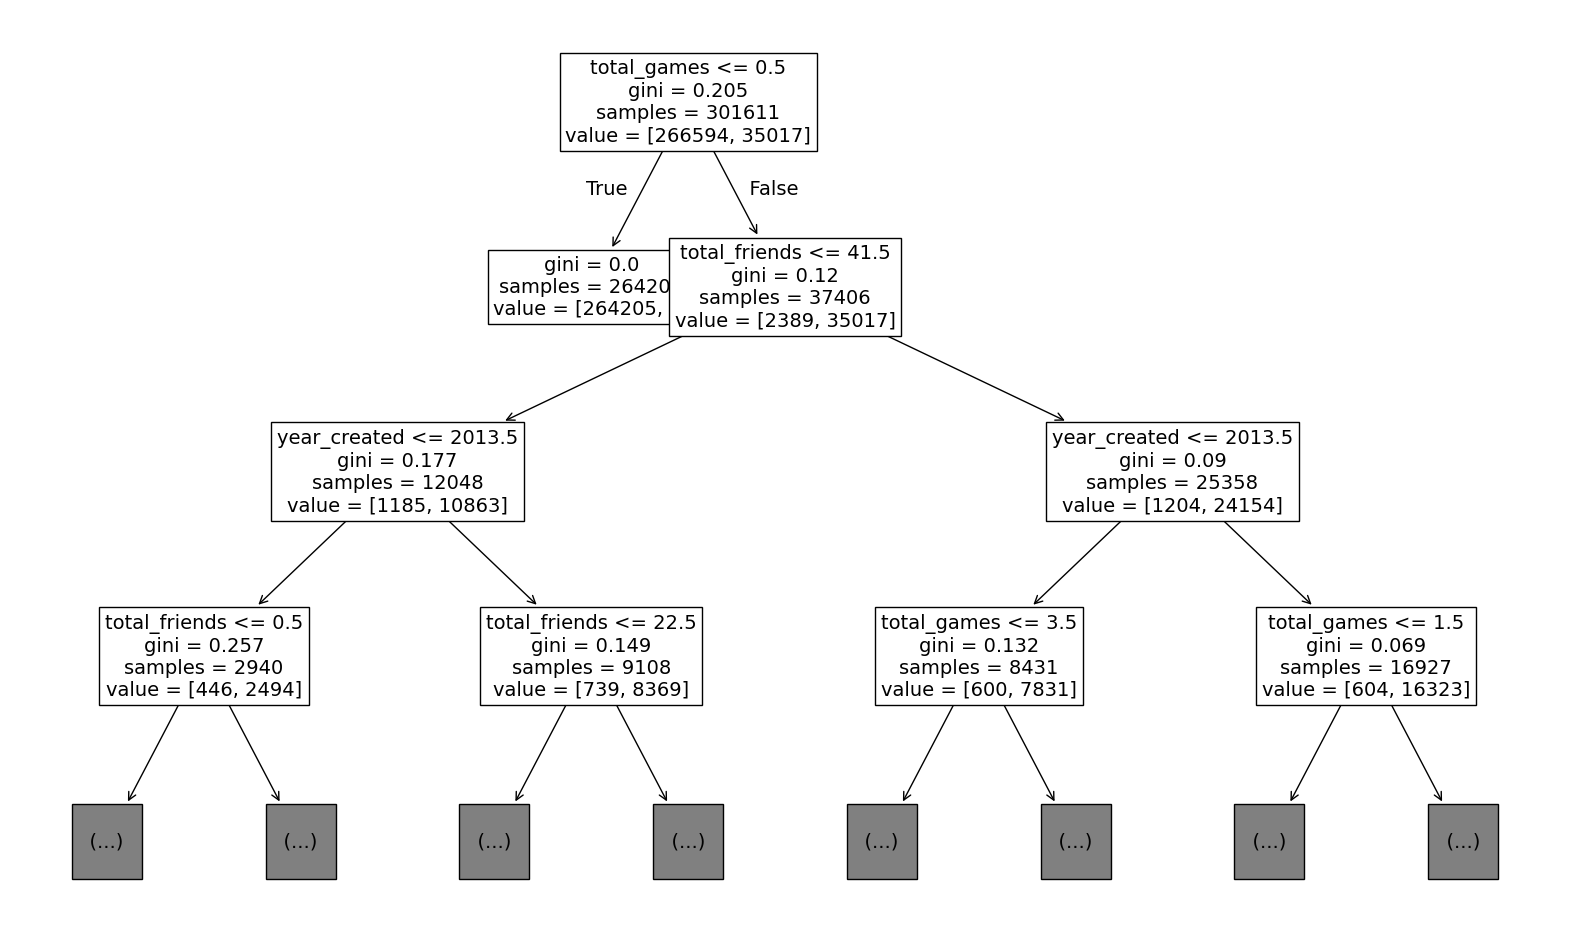

In [38]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns)

In [39]:
importances1 = decision_tree.feature_importances_
forest_importances1 = pd.DataFrame(importances1, index=X.columns, columns=["importance"])
forest_importances1 = forest_importances1.sort_values(by="importance", ascending=False)
forest_importances1

,importance
total_games,0.964126
total_friends,0.023367
year_created,0.012507


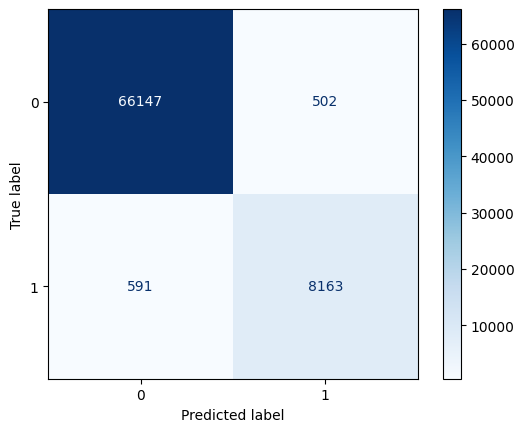

In [40]:
cm1 = metrics.confusion_matrix(y_test, y_preddd,labels=decision_tree.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=decision_tree.classes_)
disp1.plot(cmap=plt.cm.Blues)

In [41]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
cv_params = {
    'max_depth': [3, 4, 5, 6, 7,8,9,10,12,15],
    'min_sample_leaf': [1, 2, 3, 4],
   'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [5,10,15]}


scoring = {'f1': 'f1', 'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
xgb_cv = GridSearchCV(xgb, cv_params,scoring=scoring,cv=5,refit='f1')
xgb_cv = xgb_cv.fit(X_train,y_train)


In [42]:
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
                         'min_sample_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [43]:
y_predd = xgb_cv.predict(X_test)
xgb_accuracy = metrics.accuracy_score(y_test, y_predd)
xgb_f1 = metrics.f1_score(y_test, y_predd)
xgb_precision = metrics.precision_score(y_test, y_predd)
xgb_recall = metrics.recall_score(y_test, y_predd)

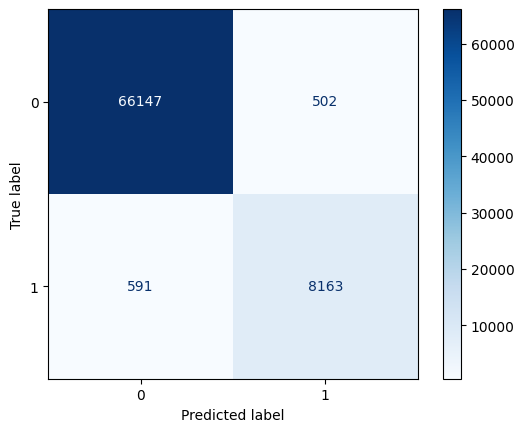

In [44]:
cm2 = metrics.confusion_matrix(y_test, y_predd,labels=xgb_cv.classes_)
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=xgb_cv.classes_)
disp2.plot(cmap=plt.cm.Blues)

Text(0.5, 1.0, 'Feature importance based on weight')

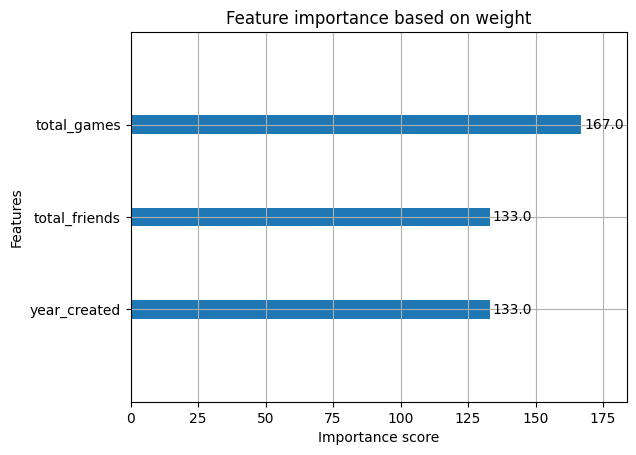

In [45]:
plot_importance(xgb_cv.best_estimator_)
plt.title('Feature importance based on weight')

In [46]:
random_forest = RandomForestClassifier(random_state=42)
cv_paramss = {
    'max_depth': [3,6,10,15],
    'n_estimators': [1,2,3]}
rf_cv = GridSearchCV(random_forest, cv_paramss, scoring=scoring, cv=5, refit='f1')
rf_cv = rf_cv.fit(X_train, y_train)
rf_cv


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 6, 10, 15],
                         'n_estimators': [1, 2, 3]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [47]:
rf_accuracy = rf_cv.score(X_test, y_test)
rf_precision = metrics.precision_score(y_test, rf_cv.predict(X_test))
rf_recall = metrics.recall_score(y_test, rf_cv.predict(X_test))
rf_f1 = metrics.f1_score(y_test, rf_cv.predict(X_test))
print(f"Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}")


Accuracy: 0.97, Precision: 0.94, Recall: 1.00, F1 Score: 0.97


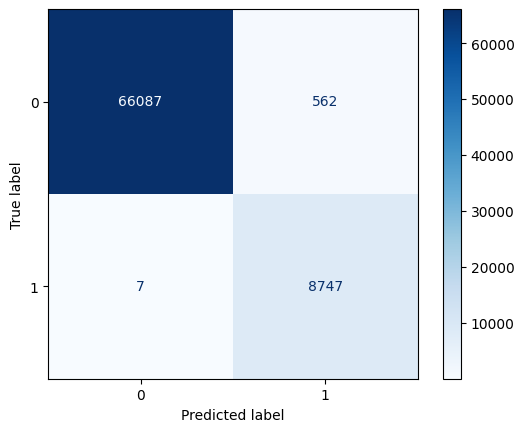

In [48]:
cm3 = metrics.confusion_matrix(y_test, rf_cv.predict(X_test),labels=rf_cv.classes_)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf_cv.classes_)
disp3.plot(cmap=plt.cm.Blues)

In [49]:
model_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest'],
    'Accuracy': [logistic_accuracy, decision_tree_accuracy, xgb_accuracy, rf_accuracy],
    'F1 Score': [logistic_f1, decision_tree_f1, xgb_f1, rf_f1],
    'Precision': [logistic_precision, decision_tree_precision, xgb_precision, rf_precision],
    'Recall': [logistic_recall, decision_tree_recall, xgb_recall, rf_recall]})
model_compare

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.936581,0.642868,0.928387,0.491661
1,Decision Tree,0.985505,0.937252,0.942066,0.932488
2,XGBoost,0.992427,0.968381,0.939710,0.998858
3,Random Forest,0.968499,0.968499,0.939628,0.999200


In [50]:
#A/B test
#Do people who play CS2 have more total games than those who don’t
#H₀: Mean total_games is equal for both groups.
#H₁: Mean total_games differs between groups.
from scipy.stats import ttest_ind
t1= players[players["play_cs2"] == 1]["total_games"]
t2= players[players["play_cs2"] == 0]["total_games"]
t_stat, p_value = ttest_ind(t1, t2, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
#Kết luận: p_value < 0.05, có thể bác bỏ giả thuyết H0, người chơi CS2 có số lượng game trong thư viện lớn hơn người không chơi CS2


T-statistic: 55.890762424389216, P-value: 0.0


In [51]:
#Do total_friends, total_games, and year_created predict CS2 playing?
#H₀: Coefficients = 0 → features have no effect
#H₁: Coefficients ≠ 0 → they have predictive power
X= players_nonull[["year_created", "total_friends", "total_games"]]
X= sm.add_constant(X)
y= players_nonull["play_cs2"]
model = sm.Logit(y, X)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.224912
         Iterations 10


In [ ]:
print(result.summary())
#Kết luận: p_value < 0.05, có thể bác bỏ giả thuyết H0, các biến độc lập có ảnh hưởng đến biến phụ thuộc play_cs2

                           Logit Regression Results                           
Dep. Variable:               play_cs2   No. Observations:               377014
Model:                          Logit   Df Residuals:                   377010
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 May 2025   Pseudo R-squ.:                  0.3736
Time:                        18:47:37   Log-Likelihood:                -84795.
converged:                       True   LL-Null:                   -1.3538e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -280.5294      3.758    -74.650      0.000    -287.895    -273.164
year_created      0.1377      0.002     73.922      0.000       0.134       0.141
total_friends     0.0014   5.33e-05     